In [3]:
import pandas as pd

data = pd.read_csv('kunden_einkaufszentrum.csv')

#check if there are null or empty cells
print(data.isnull().sum())

#gender replace male with 0 and female with 1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
#Summary statistics
print(data.describe())

       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


k=4: 20.00%
k=3: 27.00%
k=7: 22.00%
k=5: 11.00%
k=8: 13.00%
k=6: 7.00%


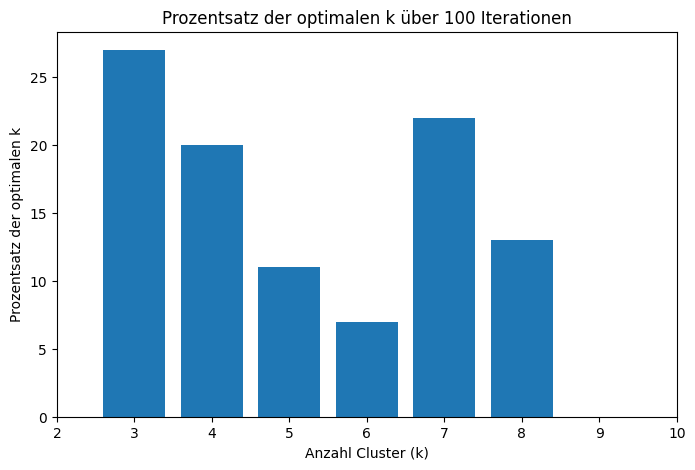

In [7]:
# k-means clustering
# determine the optimal number of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

range_n_clusters = range(2,11)
iterations = 100

k_counts = Counter()

#elbow method
for _ in range(iterations):
    sse = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    # Determine the optimal k using the Elbow method
    optimal_k = range_n_clusters[np.argmin(np.diff(sse, 2))]
    k_counts[optimal_k] += 1

# Calculate percentages
total_iterations = sum(k_counts.values())
k_percentages = {k: (count / total_iterations) * 100 for k, count in k_counts.items()}

# Print the results
for k, percentage in k_percentages.items():
    print(f"k={k}: {percentage:.2f}%")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(k_percentages.keys(), k_percentages.values())
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Prozentsatz der optimalen k")
plt.title("Prozentsatz der optimalen k über 100 Iterationen")
plt.xticks(range_n_clusters)
plt.show()


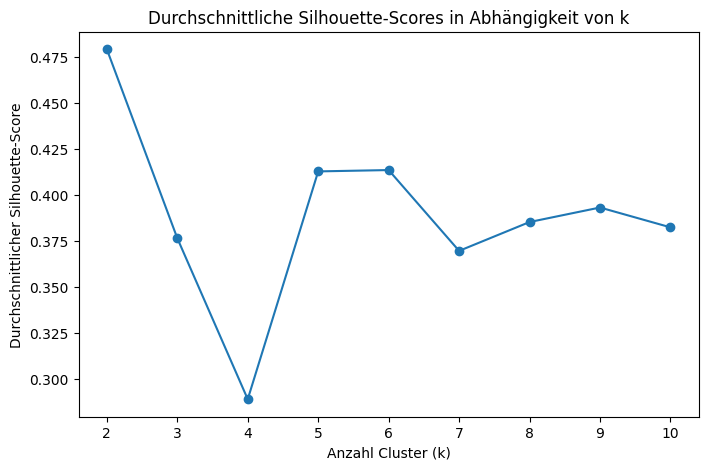

In [24]:
#Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = data.values

range_n_clusters = range(2,11)

silhouette_avgs = []

for n_clusters in range_n_clusters:
    # k-means++ als Startinitialisierung
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette Score für die aktuelle Cluster-Zuordnung berechnen
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Zum Schluss die Scores visualisieren
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o')
plt.title("Durchschnittliche Silhouette-Scores in Abhängigkeit von k")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Durchschnittlicher Silhouette-Score")
plt.xticks(range_n_clusters)
plt.show()

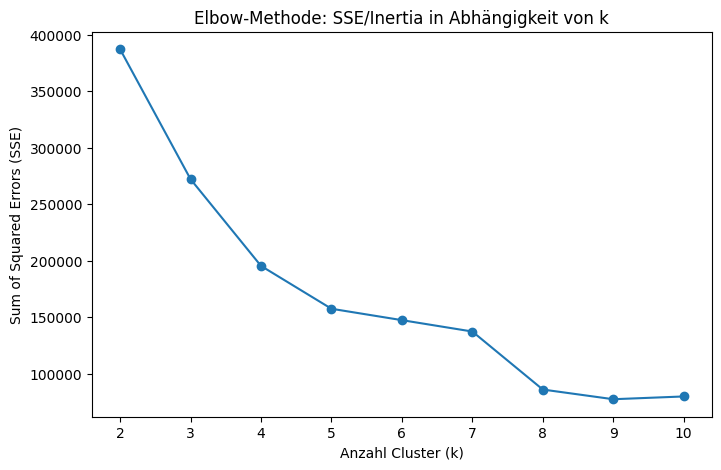

In [38]:

sse_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(
        n_clusters=n_clusters
    )
    kmeans.fit(X)
    sse_values.append(kmeans.inertia_)  # inertia_ entspricht der SSE

# Plot
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sse_values, marker='o')
plt.title("Elbow-Methode: SSE/Inertia in Abhängigkeit von k")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(range_n_clusters)
plt.show()